In [1]:
from fromscratchtoml.models import svm
import matplotlib.pyplot as plt
import torch as ch
import numpy as np

In [3]:
def visualize(X1_train, X2_train, clf=None, coarse=10):
    x_min = min(ch.min(X1_train[:,0]), ch.min(X2_train[:,0])) * 0.8
    x_max = max(ch.max(X1_train[:,0]), ch.max(X2_train[:,0])) * 1.2
    y_min = min(ch.min(X1_train[:,1]), ch.min(X2_train[:,1])) * 0.8
    y_max = max(ch.max(X1_train[:,1]), ch.max(X2_train[:,1])) * 1.2
    
    X1_train = X1_train.numpy()
    X2_train = X2_train.numpy()
    
    plt.plot(X1_train[:,0], X1_train[:,1], "mx")
    plt.plot(X2_train[:,0], X2_train[:,1], "bo")
    
    if clf is not None:
        X, Y = np.meshgrid(np.linspace(x_min, x_max, coarse), np.linspace(y_min, y_max, coarse))
        _X = np.array([[x, y] for x, y in zip(np.ravel(X), np.ravel(Y))])

        _, Z = clf.predict(ch.Tensor(_X), return_projection=True)
#         print(Z)
        Z = Z.view(X.shape)


        plt.contour(X, Y, Z, [0.0], colors='k')

    plt.show()

## Linearly seperable data

In [4]:
X1_train_lin = ch.Tensor([[8, 7], [4, 10], [9, 7], [7, 10],
               [9, 6], [4, 8], [10, 10]])

X2_train_lin = ch.Tensor([[2, 7], [8, 3], [7, 5], [4, 4],
               [4, 6], [1, 3], [2, 5]])


X1_test_lin, Y1_test_lin, X2_test_lin, Y2_test_lin = gen_lin_separable_data()

X_test_lin = ch.cat((X1_test_lin, X2_test_lin))
y_test_lin = ch.cat((Y1_test_lin, Y2_test_lin))

In [5]:
clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X_test_lin, y_test_lin)

In [6]:
clf_lin.predict(X1_train_lin)


-1
 1
-1
 1
-1
 1
-1
[torch.FloatTensor of size 7]

In [7]:
clf_lin.predict(X2_train_lin)


 1
-1
-1
-1
 1
 1
 1
[torch.FloatTensor of size 7]

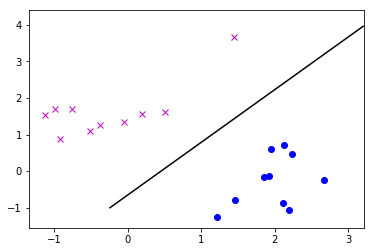

In [8]:
visualize(X1_test_lin, X2_test_lin, clf_lin)

In [9]:
clf_lin.predict(X1_test_lin)


 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
[torch.FloatTensor of size 10]

In [10]:
clf_lin.predict(X2_test_lin)


-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
[torch.FloatTensor of size 10]

## Non linearly seperable data

In [11]:
X1 = ch.Tensor([[10,10],[6,6],[6,11],[3,15],[12,6],[9,5],[16,3],[11,5]])
X2 = ch.Tensor([[3,6],[6,3],[2,9],[9,2],[18,1],[1,18],[1,13],[13,1]])
Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X1.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

In [12]:
clf = svm.SVC(kernel='polynomial', const=0, degree=2)
clf.fit(X, y)

In [13]:
clf.predict(X1)


 1
 1
 1
 1
 1
 1
 1
 1
[torch.FloatTensor of size 8]

In [14]:
clf.predict(X2)


-1
-1
-1
-1
-1
-1
-1
-1
[torch.FloatTensor of size 8]

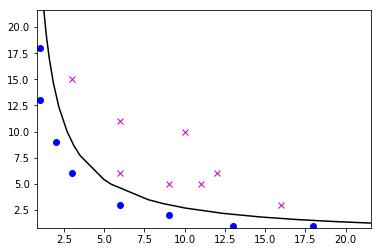

In [15]:
visualize(X1, X2, clf)

## RBF

In [16]:
X1 = ch.Tensor([[10,10],[8,6],[8,10],[8,8],[12,6],[9,5],[11,8],[11,5]])
X2 = ch.Tensor([[10,13],[6,5],[6,9],[9,2],[14,8],[12,11],[10,13],[13,4]])
Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X1.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

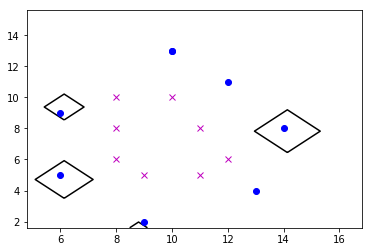

In [17]:
clf = svm.SVC(kernel='rbf', gamma=0.2)
clf.fit(X, y)
visualize(X1, X2, clf)

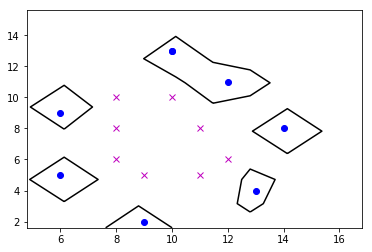

In [18]:
clf = svm.SVC(kernel='rbf', gamma=0.4)
clf.fit(X, y)
visualize(X1, X2, clf)

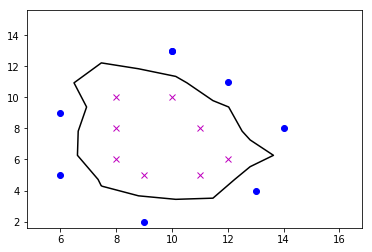

In [19]:
clf = svm.SVC(kernel='rbf', gamma=1)
clf.fit(X, y)
visualize(X1, X2, clf)

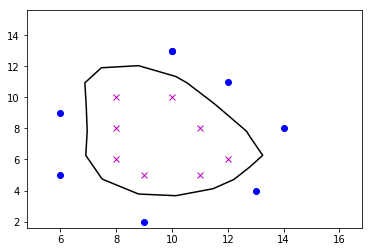

In [20]:
clf = svm.SVC(kernel='rbf', gamma=2)
clf.fit(X, y)
visualize(X1, X2, clf)

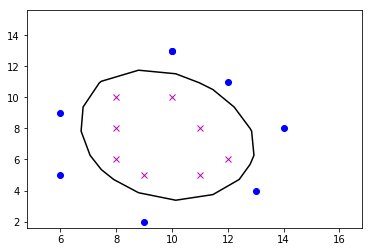

In [21]:
clf = svm.SVC(kernel='rbf', gamma=10)
clf.fit(X, y)
visualize(X1, X2, clf)

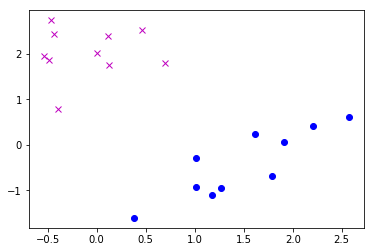

In [22]:
x1, y1, x2, y2 = gen_lin_separable_data()
visualize(ch.Tensor(x1), ch.Tensor(x2))

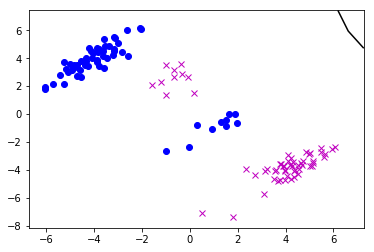

In [23]:
x1, y1, x2, y2 = gen_non_lin_separable_data()
Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X1.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

clf = svm.SVC(kernel='rbf', gamma=0.8)
clf.fit(X, y)
visualize(ch.Tensor(x1), ch.Tensor(x2), clf)

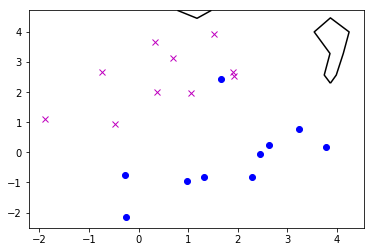

In [24]:
x1, y1, x2, y2 = gen_lin_separable_overlap_data()

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

visualize(ch.Tensor(x1), ch.Tensor(x2), clf)

In [25]:
np.array([2, 0])

array([2, 0])